Load some packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

This problem deals with simulating various Poisson processes. Let's start by going through the code that generates a Poisson process  $(𝑁_𝑡)_{0≤𝑡≤𝑇}$  with parameter  𝜆>0 .

Since we are interested in simulating the process up until time  𝑇 , we will need to keep track of the total time that has elapsed after each arrival; this is the variable 'timeCount'.

We will also keep track of the values of the Poisson process over the time interval  [0,𝑇] ; these are stored in 'Nt'. The Poisson process is simple in the sense that we know that each time it moves, it always increases by 1. This means that we could also simply store 'Nt' as an integer-valued variable, then increase it each time a jump takes place. The advantage of our approach is that it is more flexible, and we can easily modify it to implement compound Poisson processes, etc.

The final thing we need to track is the arrival times of the various events being modeled by our Poisson process. We store these as 'times', so that 'times' is ultimately a list containing the arrival times from time  𝑡=0  to time  𝑡=𝑇 .

Since we are only interested in simulating the Poisson process up to time  𝑇 , we need to keep track of how much time has elasped at the various arrivals. For example, suppose that we are simulating the process on the interval  [0,10] . If we have that  $𝑁_9=4 $, and the next arrival time is given by  $𝑆_5=14$ , then this arrival does not occur until after time  𝑇=10 , so we don't want to include it. Accordingly, the final value of the Poisson process on  [0,10]  is simply  𝑁10=4 , since it wouldn't increase to 5 until time  𝑡=14 , which is outside the window we are simulating.

Our PoissonProcess(lam,T) function ultimately returns two things; 'Nt' and 'times'. Suppose in a given simulation where  𝑇=10 , we have  $𝑆_0=0,𝑆_1=1.5,𝑆_2=7.5$ , and  $𝑆_3=11$ . Then 'Nt' = [0,1,2,2], and 'times' = [0,1.5,7.5,10]. The final value 2 of 'Nt' is repeated, since at the terminal time  𝑇=10  we have  $𝑁_{10}=2$ .

In [4]:
def PoissonProcess(lam,T):
    timeCount = 0                               #current time
    val = 0                                     #current value of PP
    Nt = [0]                                    #value of PP
    times = [0]                                 #all arrival times
    while(timeCount <= T):
        x = np.random.exponential(1/lam)        #sample interarrival times
        timeCount = timeCount + x               #curent time
        if(timeCount <= T):                     #if current time < T, record X
            val = val + 1
            Nt.append(val)
            times.append(timeCount)
        if(timeCount > T):                      #if current time > T, record last value
            Nt.append(val)
            times.append(T)
    return Nt, times

The code below simulates a single trajectory of a  𝑃𝑃(1)  process on the time interval  [0,10] .

In [5]:
PoissonSim = PoissonProcess(1,10)
PoissonSim

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 14],
 [0,
  0.15179780694019762,
  0.269526556137142,
  1.0498076862441574,
  1.3990012699891707,
  3.3822463402306173,
  3.4567788818156697,
  4.08959203524259,
  4.936339404532421,
  5.700056255766058,
  6.4459847400766215,
  6.754743258216383,
  8.84643946889887,
  9.828695497209077,
  9.964613180567047,
  10])

Below we plot the trajectory of a realization of a Poisson process with rate  1  on the time interval  [0,10] .

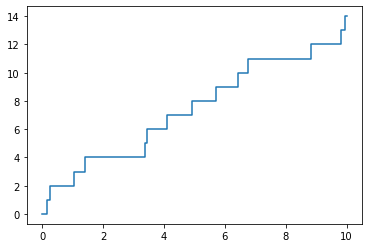

In [6]:
Nt = PoissonSim[0]
times = PoissonSim[1]
plt.plot(times, Nt, drawstyle='steps-post')